**LINEAR REGRESSION**

IMPORTING THE MODULES

In [17]:
#Importing Numpy Pandas and Matplotlib modules.
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LETS DEFINE FEW FUNCTIONS**

In [19]:

'''  A function that takes matrix as input, returns the mean normalized version of the 
   the matrix column wise'''
def mscale(mat):
    mmean= np.mean(mat,axis=0)
    mstddev=np.std(mat,axis=0)
    return (mat-mmean)/mstddev


''' A function that converts the mean normalized matrix into the previous matrix---- NOT USED MUCH '''

def mdesacle(original_mat,mat):
    mmean= np.mean(original_mat,axis=0)
    mstddev=np.std(original_mat,axis=0)
    return ((mat)*mstddev)+mmean



''' A function that reverses the mean normalisation done to the vector'''
def vdescale(original_vect, vect):
    vmean= np.mean(original_vect)
    vstddev=np.std(original_vect)
    return (vect*vstddev)+vmean



def input_test(s):
  X_test=pd.read_csv(s)   #load the training data

  # n=int(input("enter the number of features....."))

  X_test=X_test.to_numpy()    #converting to numpy
  i=len(X_test[0])       #finding the number of features
  m=X_test[:,0].size   
  y_test=X_test[:,i-1].reshape((m,1))
  X_test=np.delete(X_test,i-1,axis=1) 
  n=i-1                       #n is number of features
  u=np.ones((m,1))            #vector of ones then p.


  X_test_scaled= mscale(X_test)
  m=y_test.size
  u=np.ones((m,1))
  X_test_final=np.concatenate((u,X_test_scaled),axis=1)      #adding ones to the first column
  n=n+1
  return X_test_final, y_test


def predict( X, theta, original_y):
  Y=X@theta
  Y=vdescale(original_y,Y)
  return Y



def average(v):                                    #made nice functions for the use of average and range finding
    s=sum(v)
    m=v.size
    return s/m
def rangee(v):
    r=v.max()-v.min()
    return r

def scale(v):
    avg=average(v)
    r=np.std(v)
    u=np.ones(m).reshape(m,1)
    # f=(u*avg)
    scaled= (v-avg)*(1/r)
    return scaled






**EXTRACT THE DATA FROM THE CSV FILE**

In [20]:
s=input("enter the file dorectory/ name if in the same directory")
print("uploading a  csv file that is appropriate for linear regression.......")

X=pd.read_csv(s)   #load the training data

# n=int(input("enter the number of features....."))

X=X.to_numpy()    #converting to numpy
i=len(X[0])       #finding the number of features
m=X[:,0].size   
y=X[:,i-1].reshape((m,1))
X=np.delete(X,i-1,axis=1) 
n=i-1                       #n is number of features
u=np.ones((m,1))            #vector of ones then p.

enter the file dorectory/ name if in the same directory/content/drive/MyDrive/woc/datasets/Linear_test.csv
uploading a  csv file that is appropriate for linear regression.......


**MEAN NORMALIZING**

In [21]:
# mean normalizing the X and y so that gradient descent can converge fast
X_scaled= mscale(X)
# X_scaled= mscale(X)
y_scaled=scale(y)
m=y.size
u=np.ones((m,1))
X_scaled_withones=np.concatenate((u,X_scaled),axis=1)      #adding ones to the first column
n=n+1

NORMAL EQUATION ONLY FOR SMALL DATAS

In [22]:
# The Normal equation is executed if the data set is small .......

if(n<5000):
    if(m<5000):
        X_T=X.T
        p=np.dot(X,X_T)
        if (np.linalg.det(p)!=0):
            p_inv=np.linalg.inv(p)
            theta= np.dot((p_inv,X_T,y))


***GRADIENT DESCENT***

[0.40516971]
[0.32838277]
[0.26619488]
[0.21582137]
[0.17501048]
[0.14194103]
[0.11513984]
[0.09341495]
[0.07580183]
[0.0615198]
[0.04993688]
[0.04054138]
[0.03291893]
[0.02673389]
[0.02171436]
[0.01764006]
[0.01433245]
[0.01164681]
[0.00946585]
[0.00769444]
[0.00625546]
[0.00508633]
[0.00413631]
[0.00336422]
[0.00273663]
[0.00222643]
[0.00181159]
[0.00147426]
[0.00119989]
[0.00097672]
[0.00079516]
[0.00064743]
[0.00052722]
[0.00042938]
[0.00034974]
[0.00028491]
[0.00023212]
[0.00018914]
[0.00015413]
[0.00012562]
[0.00010239]
[8.34676404e-05]
[6.80496277e-05]
[5.54856254e-05]
[4.5246148e-05]
[3.69001742e-05]
[3.00967908e-05]
[2.45502676e-05]
[2.00279196e-05]
[1.63402361e-05]
[1.33328505e-05]
[1.0880008e-05]
[8.87924961e-06]
[7.24708749e-06]
[5.91548389e-06]
[4.82898586e-06]
[3.9423923e-06]
[3.21885459e-06]
[2.62832986e-06]
[2.14632141e-06]
[1.75285267e-06]
[1.43163149e-06]
[1.16936919e-06]
[9.55225818e-07]
[7.80357985e-07]
[6.37550459e-07]
[5.20915819e-07]
[4.2564965e-07]
[3.47830952e-

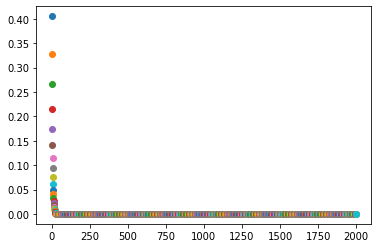

In [23]:
 
#initialise theta value to zero initially
# theta=np.zeros((n,1))

theta=(np.zeros((n,1)))
h_x=X_scaled_withones@theta
error=(h_x-y_scaled)
j= (1/2)*(1/m)*(sum((error)**2))
alpha=0.1

for i in range (2000):
    grad=alpha*(1/m)*(X_scaled_withones.T@error)
    theta=theta-grad
    h_x=np.dot(X_scaled_withones,theta)    #the hypothesis after each iteration
    error=(h_x-y_scaled)
    j= (1/2)*(1/m)*(sum((error)**2))       #printing cost after every iteration
    print(j)
    plt.scatter(i,j)                        #plotting the cost vs iteration


WE HAVE FOUND THE OPTIMAL VALUE OF THETA.....

NOW UPLOAD THE DATA SETS WHOSE VALUES HAVE TO PREDICTED

In [24]:
s=input("enter the path of the csv file")
X_test, Y_test=input_test(s)

enter the path of the csv file/content/drive/MyDrive/woc/datasets/Linear_train.csv


In [25]:
Y_predict=vdescale(y,X_test@theta)              #the predicted value of Y

This is the predicted value

In [26]:
Y_predict

array([[  285.13953316],
       [ 6416.92845266],
       [ 2640.67265719],
       ...,
       [ 1553.28221719],
       [10758.5417497 ],
       [ 2255.18553704]])

In [27]:
Y_test             #original value

array([[  311.2324909],
       [ 6393.112342 ],
       [ 2601.046223 ],
       ...,
       [ 1483.917022 ],
       [10720.13918  ],
       [ 2185.127958 ]])

In [28]:
error= Y_predict-Y_test
error

array([[-26.09295774],
       [ 23.81611066],
       [ 39.62643419],
       ...,
       [ 69.36519519],
       [ 38.4025697 ],
       [ 70.05757904]])

In [29]:
print(np.sum(error**2))

470457691.5588362


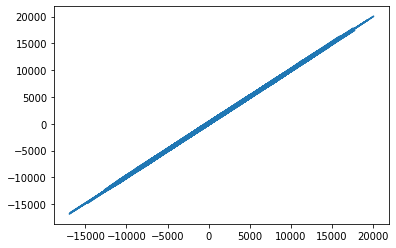

In [30]:
plt.plot(Y_test,Y_predict)

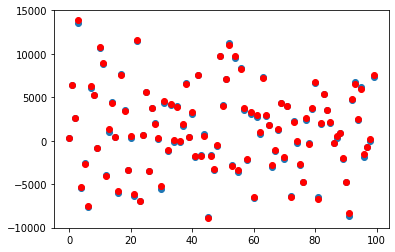

In [31]:
plt.scatter(range(100), Y_test[:100])
plt.scatter(range(100),Y_predict[:100], c='r')

216.90036688738823

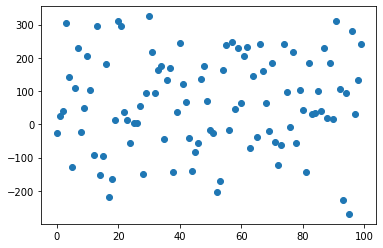

In [32]:
plt.scatter(range(100), error[:100])
(np.sum(error**2)/m)**(0.5)

In [ ]:
s=input("enter the path of the csv file")
X_test, Y_test=input_test(s)

In [ ]:
Y_predict=vdescale(y,X_test@theta)              #the predicted value of Y